In [1]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
import piplite
await piplite.install("palettable")
await piplite.install("seaborn")
import VisualizeNN as VisNN
import pyodide
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
sns.set(rc={'figure.figsize':(11.7,8.27)})

## 1. 散布図による分析

In [2]:
data = pd.read_csv(pyodide.http.open_url("https://raw.githubusercontent.com/ChungWookyung/kg-jupyterlite-data-analysis/main/content/DATA/iris.csv"))
data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


- sepal.length : がく片の長さ
- sepal.width : がく片の幅
- petal.length : 花びらの長さ
- petal.length : 花びらの幅
- variety : 花の種類

データが何を意味しているのか、グラフで見る（散布図）

<AxesSubplot:xlabel='sepal.length', ylabel='sepal.width'>

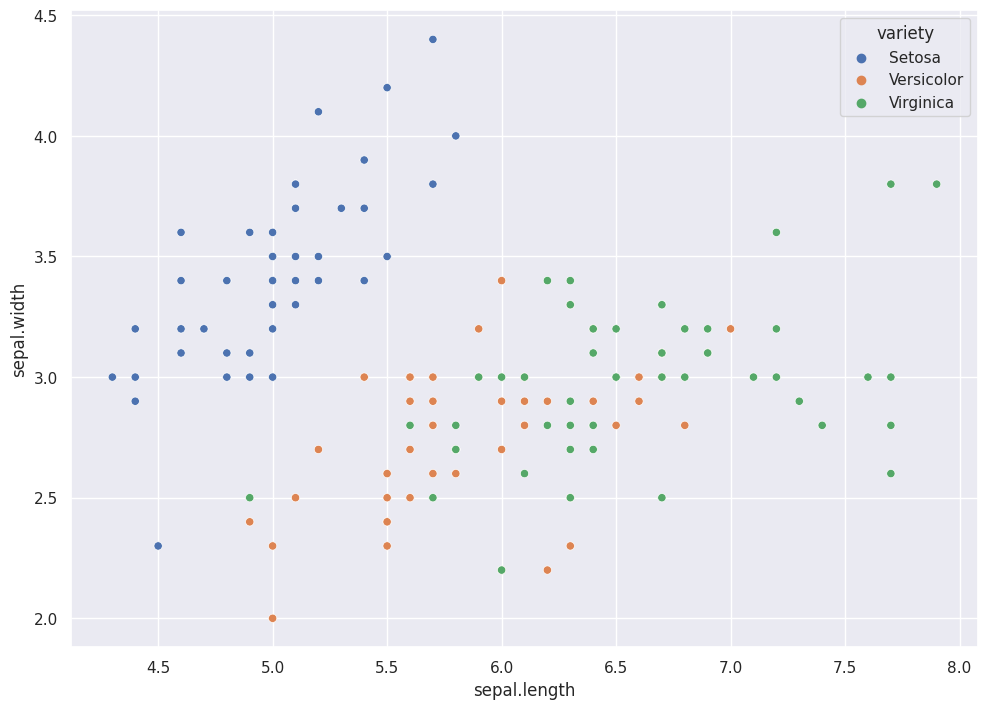

In [3]:
sns.scatterplot(data = data, x = "sepal.length", y = "sepal.width", hue = "variety")

<AxesSubplot:xlabel='petal.length', ylabel='petal.width'>

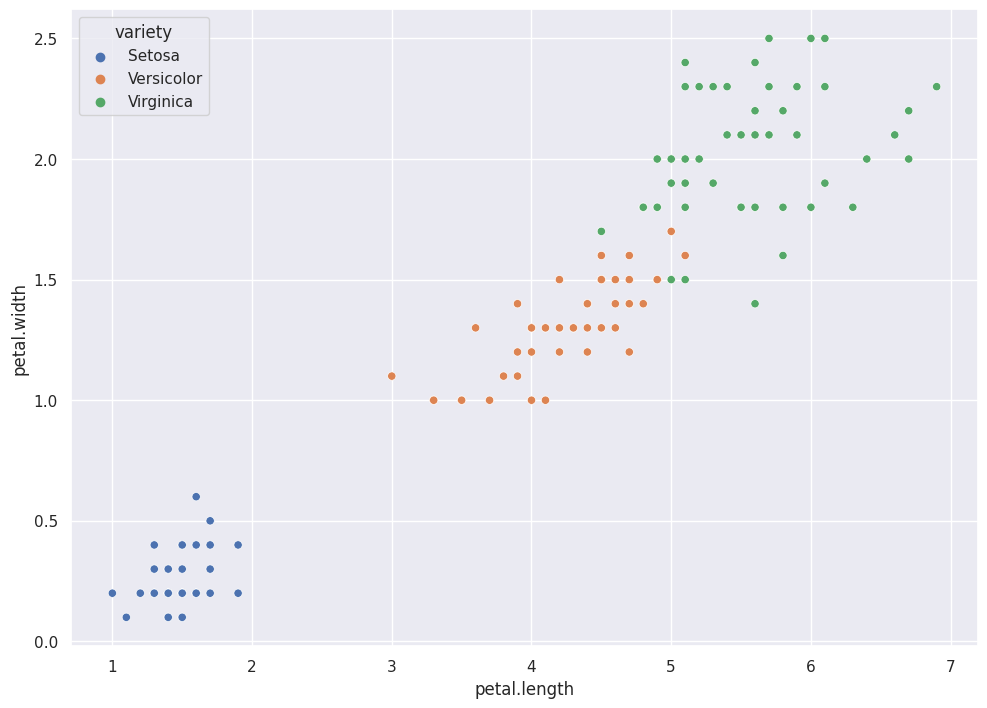

In [4]:
sns.scatterplot(data = data, x = "petal.length", y = "petal.width", hue = "variety")

## 2. 基礎統計による分析

In [6]:
data.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


- count : 標本の数
- mean : 平均
- std : 標準偏差
- min : 最小値
- 25% : 第１四分位数
- 50% : 第２四分位数(中央値)
- 75% : 第３四分位数
- max : 最大値

In [10]:
data.groupby("variety").describe().T

variety                Setosa  Versicolor  Virginica
sepal.length count  50.000000   50.000000  50.000000
             mean    5.006000    5.936000   6.588000
             std     0.352490    0.516171   0.635880
             min     4.300000    4.900000   4.900000
             25%     4.800000    5.600000   6.225000
             50%     5.000000    5.900000   6.500000
             75%     5.200000    6.300000   6.900000
             max     5.800000    7.000000   7.900000
sepal.width  count  50.000000   50.000000  50.000000
             mean    3.428000    2.770000   2.974000
             std     0.379064    0.313798   0.322497
             min     2.300000    2.000000   2.200000
             25%     3.200000    2.525000   2.800000
             50%     3.400000    2.800000   3.000000
             75%     3.675000    3.000000   3.175000
             max     4.400000    3.400000   3.800000
petal.length count  50.000000   50.000000  50.000000
             mean    1.462000    4.260000   5.552000
             std     0.173664    0.469911   0.551895
             min     1.000000    3.000000   4.500000
             25%     1.400000    4.000000   5.100000
             50%     1.500000    4.350000   5.550000
             75%     1.575000    4.600000   5.875000
             max     1.900000    5.100000   6.900000
petal.width  count  50.000000   50.000000  50.000000
             mean    0.246000    1.326000   2.026000
             std     0.105386    0.197753   0.274650
             min     0.100000    1.000000   1.400000
             25%     0.200000    1.200000   1.800000
             50%     0.200000    1.300000   2.000000
             75%     0.300000    1.500000   2.300000
             max     0.600000    1.800000   2.500000

## 3. 学習データとテストデータ

In [26]:
train = data.sample(frac=0.8, random_state=1234).sort_values("variety")
test = data.drop(train.index)
train.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
17,5.1,3.5,1.4,0.3,Setosa
39,5.1,3.4,1.5,0.2,Setosa
11,4.8,3.4,1.6,0.2,Setosa
49,5.0,3.3,1.4,0.2,Setosa
40,5.0,3.5,1.3,0.3,Setosa


In [27]:
test.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
12,4.8,3.0,1.4,0.1,Setosa
19,5.1,3.8,1.5,0.3,Setosa
23,5.1,3.3,1.7,0.5,Setosa


120個の学習データtrainと30個のテストデータtestに分けた

<AxesSubplot:xlabel='petal.length', ylabel='petal.width'>

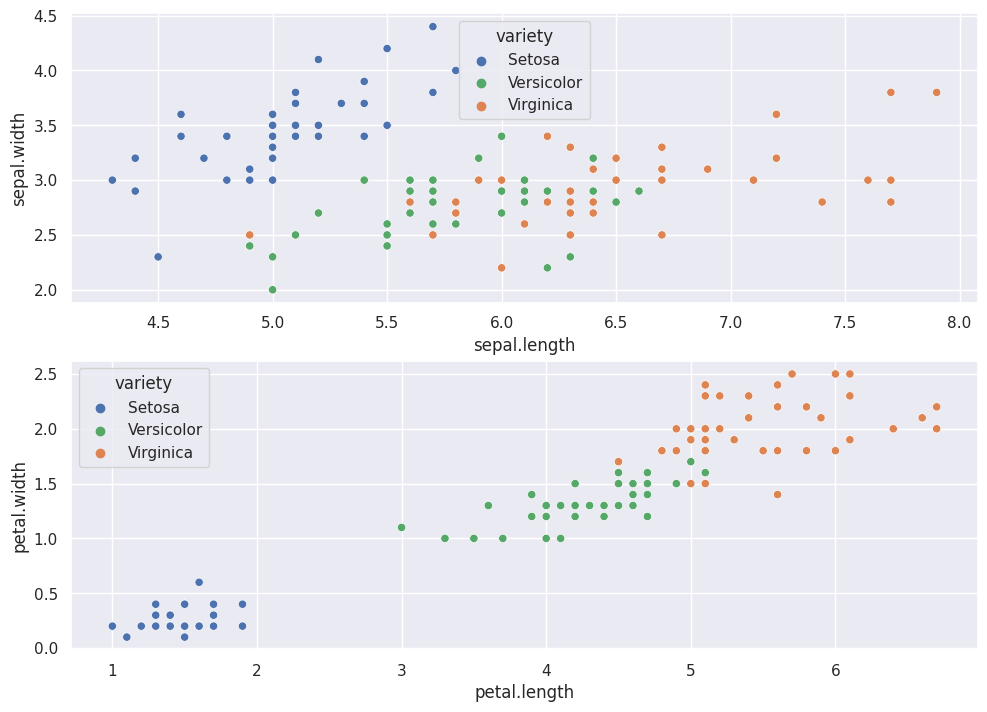

In [28]:
fig, axs = plt.subplots(nrows=2)
pal = dict(Setosa=sns.color_palette()[0], Virginica=sns.color_palette()[1], Versicolor=sns.color_palette()[2])
sns.scatterplot(data = train, x = "sepal.length", y = "sepal.width", hue = "variety", ax = axs[0], palette = pal)
sns.scatterplot(data = train, x = "petal.length", y = "petal.width", hue = "variety", ax = axs[1], palette = pal)

学習データの散布図

<AxesSubplot:xlabel='petal.length', ylabel='petal.width'>

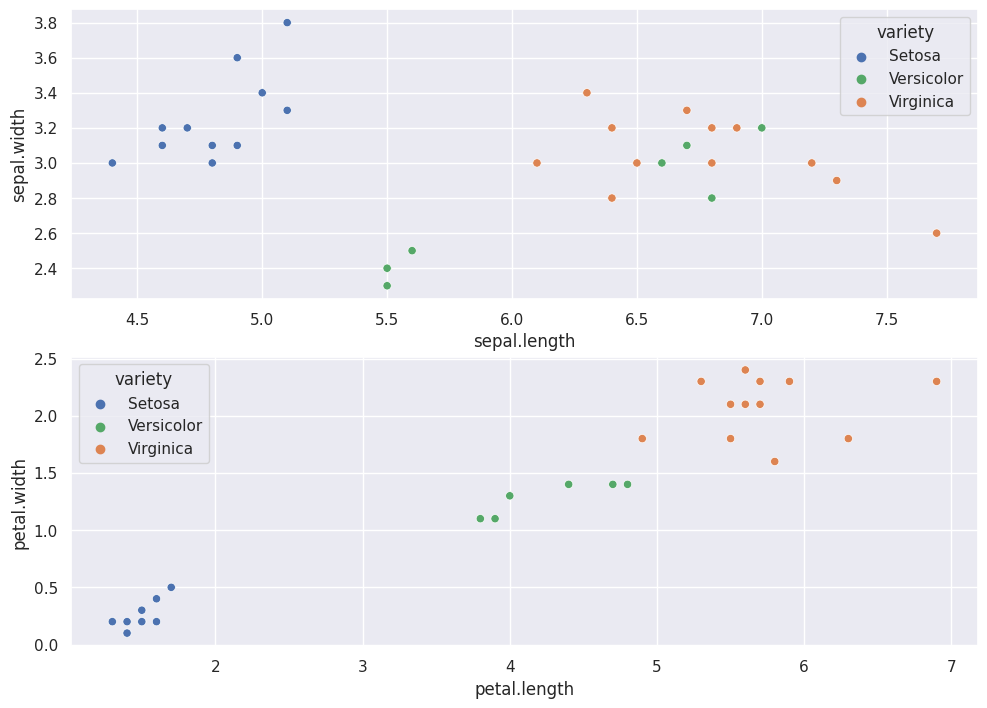

In [29]:
fig, axs = plt.subplots(nrows=2)
pal = dict(Setosa=sns.color_palette()[0], Virginica=sns.color_palette()[1], Versicolor=sns.color_palette()[2])
sns.scatterplot(data = test, x = "sepal.length", y = "sepal.width", hue = "variety", ax = axs[0], palette=pal)
sns.scatterplot(data = test, x = "petal.length", y = "petal.width", hue = "variety", ax = axs[1], palette=pal)

テストデータの散布図

In [30]:
train.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,120.000000,120.000000,120.000000,120.000000
mean,5.823333,3.057500,3.740000,1.194167
std,0.786411,0.460847,1.726287,0.745101
min,4.300000,2.000000,1.000000,0.100000
25%,5.175000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.300000,3.400000,5.100000,1.800000
max,7.900000,4.400000,6.700000,2.500000


In [31]:
test.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,30.000000,30.000000,30.000000,30.000000
mean,5.923333,3.056667,3.830000,1.220000
std,0.988445,0.323433,1.943184,0.840525
min,4.400000,2.300000,1.300000,0.100000
25%,4.925000,3.000000,1.525000,0.225000
50%,6.200000,3.100000,4.400000,1.400000
75%,6.775000,3.200000,5.575000,2.025000
max,7.700000,3.800000,6.900000,2.400000


## 4 ニューラルネットワークの構築

In [85]:
X_train = train.loc[:,["sepal.length","sepal.width","petal.length","petal.width"]].values
Y_train = pd.get_dummies(train.loc[:,["variety"]], columns=["variety"])

まずは、ニューラルネットワークモデルを学習させるためのXとYデータを分けておく
- X_train : がく片と花びらの長さ、幅のデータ
- Y_train : 花の種類の学習データ

In [122]:
first = 4
second = 2
model = MLPClassifier(hidden_layer_sizes=(first,second,), alpha=0.5, max_iter=5000, random_state=1234)
model = model.fit(X_train, Y_train)

１階層に4つのニューロンがあり、２階層に2つのニューロンがあるモデルを構築し、学習させた

In [124]:
model.score(X_train, Y_train)

0.6416666666666667

学習データにおける正確度

In [125]:
X_test = test.loc[:,["sepal.length","sepal.width","petal.length","petal.width"]].values
Y_test = pd.get_dummies(test.loc[:,["variety"]], columns=["variety"])
model.score(X_test, Y_test)

0.7666666666666667

テストデータにおける正確度

## 5 ニューラルネットワークモデルの図式化

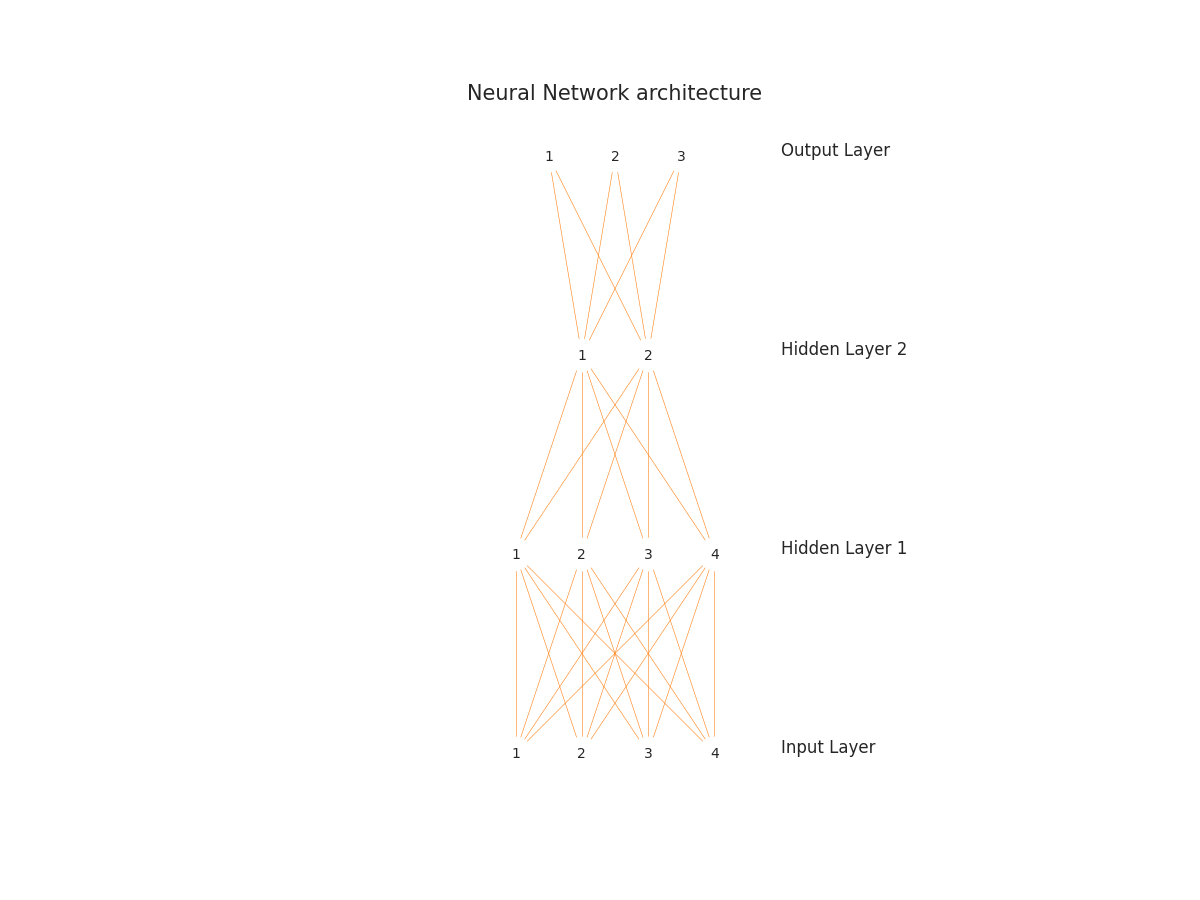

<Figure size 1200x900 with 0 Axes>

In [126]:
network_structure = np.hstack(([X_train.shape[1]], np.asarray(model.hidden_layer_sizes), [3]))
network=VisNN.DrawNN(network_structure)
network.draw()

モデルの各ニューロンは上のようにつながっている

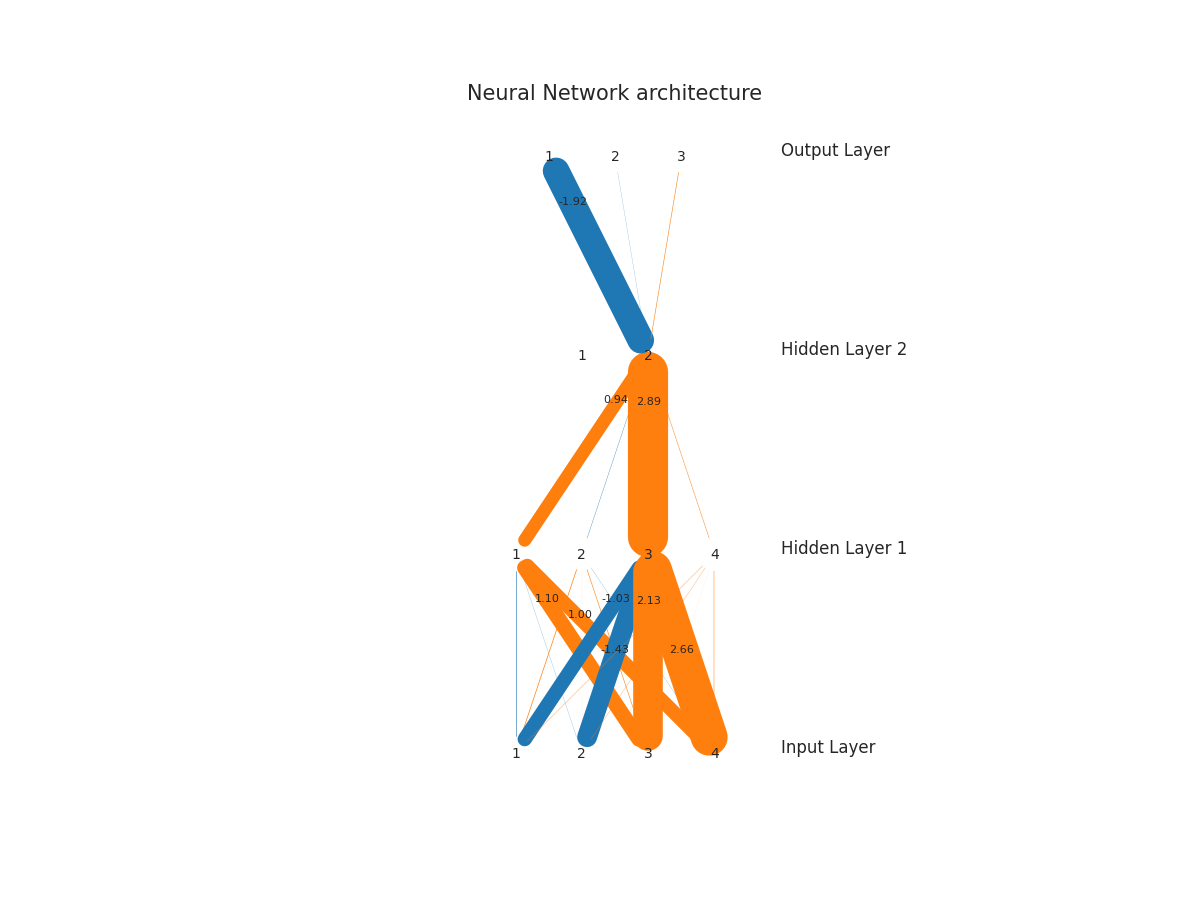

<Figure size 1200x900 with 0 Axes>

In [127]:
network=VisNN.DrawNN(network_structure, model.coefs_)
network.draw()

学習されたニューロンの間の連結を図式化した